In [1]:
%pylab inline
from app.analysis import Quote
foreign = Quote.screen_funds('Equities', 'Foreign', max_expense=.8) + ['VT', 'ACWI', 'ACWV']
quote = Quote(foreign, 126, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

Populating the interactive namespace from numpy and matplotlib
from 2019-01-29 to 2019-07-29 - 87


In [2]:
stats = quote.statistics()
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats.sort_values('mean', ascending=False).head(20)

80


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
ASHR,122,0.133027,0.732353,0.170806,19.535861,16.661257
EWL,122,0.113745,0.268213,0.394496,15.478900,3.113807
HEDJ,122,0.108812,0.340824,0.295975,14.350449,6.313765
DBEU,122,0.102314,0.264235,0.357174,14.428040,4.396349
HEZU,122,0.102189,0.308599,0.305419,13.460238,5.853812
EWA,122,0.100645,0.239563,0.386990,14.213259,3.321207
RSX,122,0.096544,0.365654,0.242326,14.644750,5.962674
EFG,122,0.094704,0.269024,0.322527,13.338099,4.537548
VIGI,122,0.091208,0.246679,0.337570,12.834376,4.587566


evicted EWP 0.865 0.346
evicted EWC 0.858 0.166
evicted SCZ 0.890 0.298
evicted BBJP 0.792 0.237
evicted EFAV 0.890 0.392
evicted EWH 0.897 0.294
evicted EPP 0.850 0.355
evicted KWEB 0.778 0.166
evicted DWX 0.886 0.387
evicted DGS 0.886 0.414
evicted VIGI 0.848 0.399
evicted INDA 0.412 0.203
evicted EWZ 0.421 0.215
evicted EWT 0.574 0.424
evicted ASHR 0.619 0.313
evicted RSX 0.509 0.401
evicted DBEU 0.710 0.609
retry backlogs ['SPDW', 'VEU', 'VGK', 'IEV', 'SCHF', 'EEM', 'PXF', 'VPL', 'ACWI', 'EFG', 'IPAC', 'IEMG', 'SCHC', 'DEM', 'DWM', 'VEA', 'EWJ', 'JPIN', 'EFA', 'IXUS', 'IQDF', 'ACWX', 'EWQ', 'FNDC', 'FNDE', 'SPEM', 'VWO', 'GSIE', 'IEFA', 'VXUS', 'EZU', 'INTF', 'BBEU', 'IEUR', 'FNDF', 'EWU', 'CWI', 'FDT', 'EFV', 'VT', 'DLS', 'AAXJ', 'IDEV', 'DBEF', 'VSS', 'GEM', 'MCHI', 'FEZ', 'TLTD', 'VYMI', 'IDV', 'RODM', 'GWX', 'HEZU', 'AIA', 'EWG', 'HEFA', 'HEDJ', 'GXC', 'SCHE'] at 0.905/-0.51 - 0.451
evicted EWJ 0.827 0.564
evicted RODM 0.849 0.666
evicted EWG 0.873 0.534
evicted GXC 0.896 0.373

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,122.0,0.095004,0.193112,-0.365722,-0.030778,0.062428,0.224932,0.626270,0.450866,13.540256,2.443879
ACWV,122.0,0.083246,0.182564,-0.347192,-0.049286,0.071012,0.210393,0.655919,0.412508,12.263724,2.071798
EWL,122.0,0.113745,0.268213,-0.471248,-0.077372,0.094580,0.305219,0.749619,0.394496,15.478900,3.113807
EWA,122.0,0.100645,0.239563,-0.340795,-0.082176,0.086737,0.240787,0.762436,0.386990,14.213259,3.321207


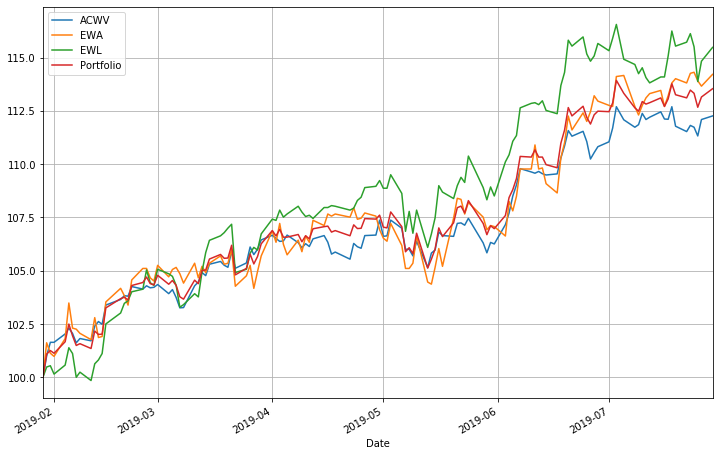

In [3]:
bounds = .08, .12
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio(_lambda=1, bounds=bounds)
quote.setup_mask(['ACWV', 'EWA', 'EWL'])
sd.update(quote.optimize_portfolio(_lambda=1, bounds=bounds))
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio(_lambda=1, bounds=bounds))
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)